In [9]:
import numpy as np

m = np.array([[1,2], [3,4], [3,1]])
v = np.array([[1,1]])
m

array([[1, 2],
       [3, 4],
       [3, 1]])

In [3]:
from scipy.spatial import distance
#-- see https://docs.scipy.org/doc/scipy-1.0.0/reference/generated/scipy.spatial.distance.cdist.html
sim = distance.cdist(v, m, 'cosine')
sim

array([[ 0.0513167 ,  0.01005051,  0.10557281]])

In [4]:
from numpy import linalg as la
#-- see https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.norm.html
la.norm(m, axis=0)

array([ 4.35889894,  4.58257569])

In [5]:
 1 - np.dot([3,4], [1,1]) /(la.norm([3,4]) * la.norm([1,1]))

0.010050506338833531

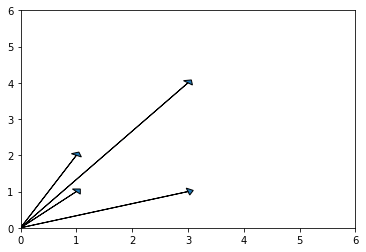

In [6]:
import matplotlib.pyplot as plt

ax = plt.axes()
ax.arrow(0, 0, *m[0], head_width=0.2, head_length=0.1)
ax.arrow(0, 0, *m[1], head_width=0.2, head_length=0.1)
ax.arrow(0, 0, *m[2], head_width=0.2, head_length=0.1)
ax.arrow(0, 0, *v[0], head_width=0.2, head_length=0.1)
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.show()

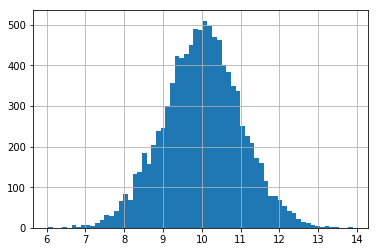

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = 10 + np.random.randn(10000)
#n, bins, patches = plt.hist(x, 'auto')
plt.hist(x, 'auto')
plt.grid(True)
plt.show()

In [13]:
from keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = image.load_img('imagePhone/P_20180320_103351_vHDR_Auto.jpg', target_size=(224, 224))
#img = image.load_img('imagePhone/P_20180320_103351_vHDR_Auto.jpg')
#img3D = mpimg.imread('imagePhone/P_20180320_103351_vHDR_Auto.jpg')
img3D = image.img_to_array(img)
img3D = img3D.reshape((1,) + img3D.shape)

i = 0
for batch in datagen.flow(img3D, batch_size=1, save_to_dir='preview', save_prefix='cat', save_format='jpg'):
    i += 1
    if i > 20:
        break 

        
#img3D = img3D/255
#plt.imshow(img3D)
#plt.show()

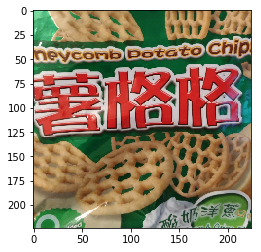

In [4]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = image.load_img("tmp/15292834341551278923784.jpg", target_size=(224, 224))
img_cv2 = cv2.imread("tmp/15292834341551278923784.jpg")
MAX_H = 224
MAX_W = 224
#-- BGR => RGB
img_cv2 = img_cv2[:,:,::-1]
h, w = img_cv2.shape[:2]
if h != w:
    scaledFac = MAX_H/float(h)
    scaledFac_w = MAX_W/float(w)
    if scaledFac < scaledFac_w:
        scaledFac = scaledFac_w
    img_cv2 = cv2.resize(img_cv2, None, fx=scaledFac, fy=scaledFac)
    h, w = img_cv2.shape[:2]

    box_h = MAX_H
    box_w = MAX_W
    top = int((h - box_h) / 2.0) if box_h < h else 0
    left = int((w - box_w) / 2.0) if box_w < w else 0
    img_cv2 = img_cv2[ top : top+box_h, left : left+box_w ]
else:
    img_cv2 = cv2.resize(img_cv2, (MAX_W, MAX_H))    
plt.imshow(img_cv2)
plt.show()

In [13]:
from keras.applications.vgg16 import preprocess_input
x = image.img_to_array(img_cv2)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import decode_predictions
model = VGG16(weights='imagenet')
preds = model.predict(x)
print('Predicted: ')
for t in decode_predictions(preds, top=20)[0]:
    print '{}-{}'.format(t[0], t[1])

Predicted: 
n07695742-pretzel
n03871628-packet
n07697313-cheeseburger
n04476259-tray
n04542943-waffle_iron
n07831146-carbonara
n07579787-plate
n04204238-shopping_basket
n07697537-hotdog
n07565083-menu
n07583066-guacamole
n07693725-bagel
n03803284-muzzle
n07684084-French_loaf
n07875152-potpie
n07248320-book_jacket
n02776631-bakery
n03840681-ocarina
n07760859-custard_apple
n12144580-corn


(1, 320, 320, 3)


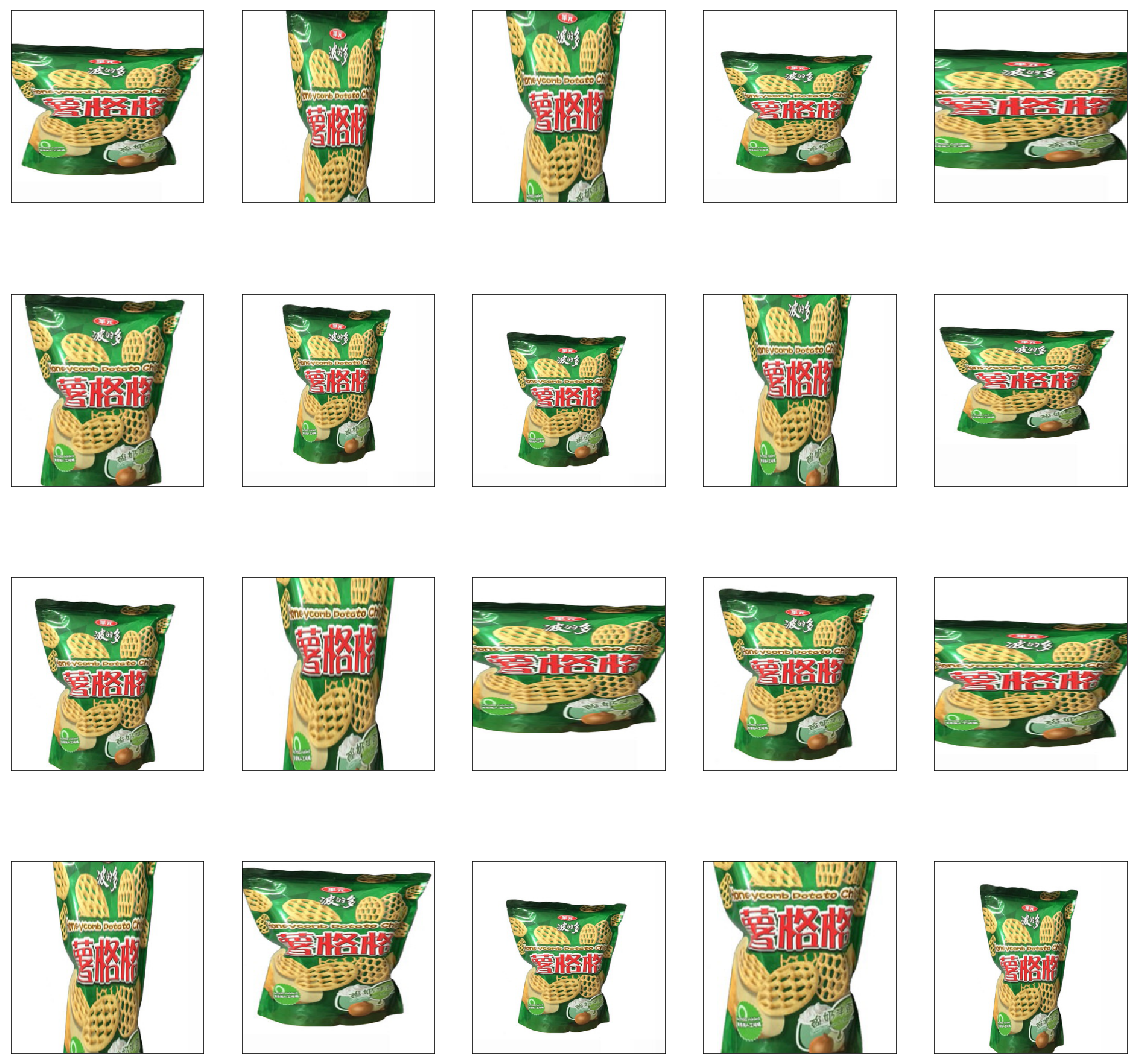

In [2]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np

datagen = ImageDataGenerator(
        rescale=1. / 255,
        height_shift_range=0.1,
        zoom_range=0.6,
        fill_mode='nearest'
)

imgs = []
img = load_img('tmp/5630161_L.jpg')
x = img_to_array(img)
imgs.append(x)
#img = load_img('tmp/5411919_L.jpg')
#x = img_to_array(img)
#imgs.append(x)
x = np.asarray(imgs)
print x.shape

datagen.fit(x)

plt.figure(figsize=(20, 20))
bsize = 20
i = 0
for x_batch in datagen.flow(x, batch_size=bsize, save_to_dir='tmp/5630161/', save_format='jpeg'):
#    print x_batch.shape
#    for i in range(0, bsize):
    
    plt.subplot(4, 5, 1 + i)
    fig = plt.imshow(x_batch[0])    
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)    
    
    i += 1
    if bsize <= i:
        break        
plt.show()

Found 5 images belonging to 4 classes.
{'n07695742-pretzel': 2, 'n04204238-shopping_basket': 1, 'n07831146-carbonara': 3, 'n03871628-packet': 0}
(5, 224, 224, 3)
(5,)
[ 0.  3.  0.  1.  2.]


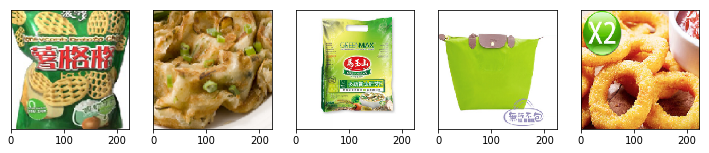

In [5]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.5,
    fill_mode='nearest'
)

train_gen = datagen.flow_from_directory( 
    'tmp/mini_train/',    
    target_size=(224, 224),
    batch_size=10,
    class_mode='binary'
)

#print train_gen.__dict__
print train_gen.class_indices

plt.figure(figsize=(20, 20))
for x_bat, y_bat in train_gen:
    print x_bat.shape    
    print y_bat.shape
    
    print y_bat
        
    for i in range(x_bat.shape[0]):            
        plt.subplot(1, 8, i+1)
        axesImg = plt.imshow(x_bat[i])
        axesImg.axes.get_yaxis().set_visible(False)
        
    break
plt.show()    

[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


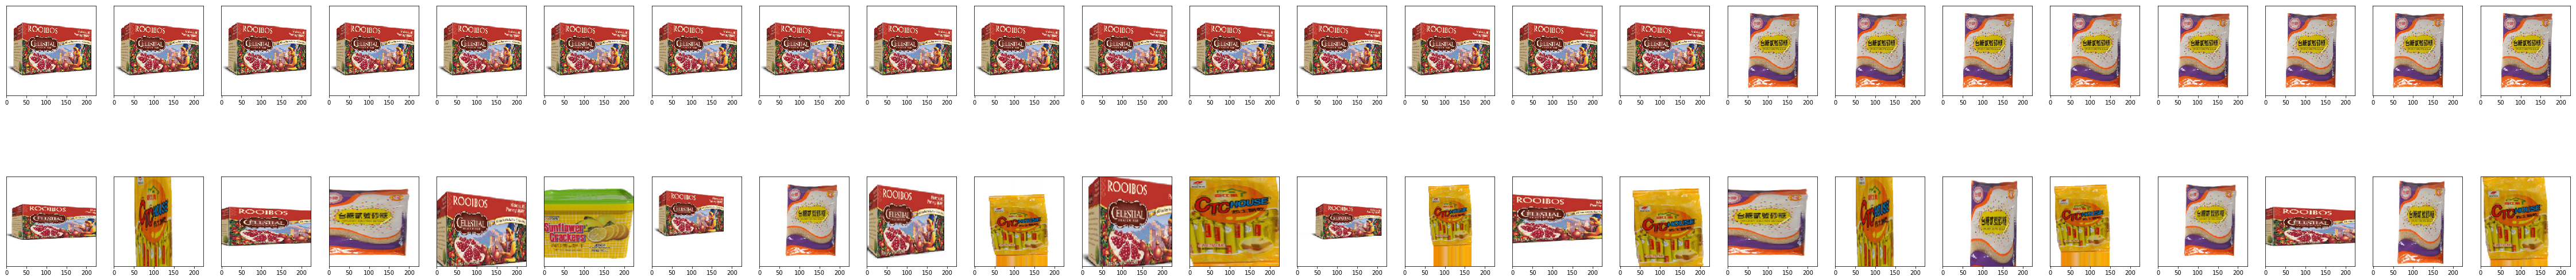

In [16]:
import os
import random
import logging
import numpy as np
import keras.applications.vgg16 as vgg16
import keras.layers as layers

from numpy import linalg as LA
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.models import Sequential
from keras import optimizers
from keras import backend as K
from keras.datasets import cifar10



logging.basicConfig(level=logging.INFO, format='%(asctime)s %(levelname)s: %(message)s', datefmt="%Y-%m-%d %H:%M:%S")

TRAIN_PATH = 'mini_train/train/'
IMG_H = 224
IMG_W = 224
DIM_OUTPUT = 4096
BATCH_SIZE = 64
AUG_SIZE_PER_IMAGE = 8
EPOCHS = 20



def create_base_network(input_shape):
    core_model = vgg16.VGG16(weights='imagenet', input_shape=input_shape)
    #-- set trainable layers
    for i, l in enumerate(core_model.layers):
        if i < 15:
            l.trainable = False
        else:
            l.trainable = True
        logging.info('{} {}.trainable: {}'.format(i, l.name, l.trainable))
    
    model = Model(inputs=core_model.input, outputs=core_model.get_layer('fc2').output)
    return model


def model_vgg16_fc2() :
    base_model = vgg16.VGG16(weights='imagenet')
    model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)
    return model


def xy_generator(imgFPs, size_anchor, img2vct_cnn, dist_identical_img=1.0e-3):
    imgDataGen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.5,
        width_shift_range=0.1,
        height_shift_range=0.1,
        fill_mode='nearest'
    )

    while True:
        x_pairs = []
        y_labels = []

        anchor_imgs = []
        anchor_ids = np.random.randint(len(imgFPs), size=size_anchor)
        imgfps = []
        for i in anchor_ids:
            imgfps.append(imgFPs[i])
            img = image.load_img(imgFPs[i], target_size=(224, 224))
            img_nda = image.img_to_array(img)
            anchor_imgs.append(img_nda)
        x = np.array(anchor_imgs)
        
        x = vgg16.preprocess_input(x)
        feavcts = img2vct_cnn.predict(x)

        labels = [None] * x.shape[0]
        norm_feavcts = LA.norm(feavcts, axis=1)
        for x_i, fv in enumerate(feavcts):
            sim = np.dot(feavcts, fv)
            sim = 1 - sim/LA.norm(fv)/norm_feavcts
###            sim_ids = np.argsort(sim)
            for j in range(x_i, len(sim)):
                if sim[j] <= dist_identical_img:
                    if labels[j] is None:
                        labels[j] = x_i
                        if j != x_i:
                            logging.info('{} {} are identical images'.format(imgfps[j], imgfps[x_i]))

        size_aug = AUG_SIZE_PER_IMAGE
        labels = set(labels)
        if len(labels) < 2:
            continue
        
        x_train = []
        y_train = []
        #-- duplicates for image augmentation 
        for x_i in labels:
            for i in range(size_aug):
                y_train.append(x_i)
                x_train.append(anchor_imgs[x_i])
        y_train = np.array(y_train)
        x_train = np.array(x_train)
        logging.debug('x_train: {}'.format(x_train.shape))
        logging.debug('y_train: {}'.format(y_train.shape))

        for x_aug_img, y_aug_labels in imgDataGen.flow(
                                        x_train, y_train,
                                        batch_size=BATCH_SIZE, 
#                                        save_to_dir='tmp_aug_sub22850',
#                                        save_prefix='jpeg'
                                        ):

            labels = np.asarray(y_aug_labels)
            dedup_labels = np.asarray( list(set(y_aug_labels)) )
            logging.debug('num classes: {}'.format(len(dedup_labels)))
            if len(dedup_labels) < 2:
                logging.error('num classes: {} < 2'.foramt(len(dedup_labels)))
                break

            #-- indices of samples grouped by labels,
            #   e.g. [ array([2]), array([3]), array([6]), array([1, 5]), ... ]
            ids_labels = [ np.where(labels == l)[0] for l in dedup_labels ]
            #-- min size of sample indices arrays
            n = min( len(ids) for ids in ids_labels )
            logging.debug('min(len(indices of samples) for all labels): {}'.format(n))
            if n < 2:
                logging.warn('re-sampling (augmentation) again, due to {} < 2'.format(n))
                break

            num_classes = len(ids_labels)
            for i_l in range(num_classes):
                logging.debug('labels[{}]= {}, at indices {}'.format(i_l, dedup_labels[i_l], ids_labels[i_l]))
                for i in range(n):
                    #-- positive sample pair
                    j, k = ids_labels[i_l][i], ids_labels[i_l][(i+1) % n]
#                    x_pairs += [ [x_aug_img[j], x_aug_img[k]] ]
                    x_pairs += [ [anchor_imgs[i_l]/255, x_aug_img[k]] ]

                    #-- negative sample pair
                    r = random.randrange(1, num_classes)
                    i_l_neg = (i_l + r) % num_classes
                    j, k = ids_labels[i_l][i], ids_labels[i_l_neg][i]
#                    x_pairs += [ [x_aug_img[j], x_aug_img[k]] ]
                    x_pairs += [ [anchor_imgs[i_l]/255, x_aug_img[k]] ]
                    y_labels += [1, 0]

            break
                
        x_pairs_np = np.array(x_pairs)
        y_labels_np = np.array(y_labels)
        logging.debug('x\'s shape:{}'.format(x_pairs_np.shape))
        logging.debug('y\'s shape:{}'.format(y_labels_np.shape))

        return [x_pairs_np[:,0], x_pairs_np[:,1]], y_labels_np


    
if '__main__' ==  __name__:
    trainDir = './TITAN/image_search/img_sub111'
    imgFPs = [ os.path.join(trainDir, f) for f in os.listdir(trainDir) if os.path.isfile( os.path.join(trainDir, f)) ]
    
    img2vct_cnn = model_vgg16_fc2()
    t = img2vct_cnn.predict( np.zeros((1, 224, 224, 3)) )    

    [x0, x1], y = xy_generator(imgFPs, 4, img2vct_cnn)

    print y
    
    import matplotlib.pyplot as plt
    plt.figure(figsize=(80, 10))
    
    for i in range(24):
        plt.subplot(2, 24, i +1)
        axesImg = plt.imshow(x0[i])
        axesImg.axes.get_yaxis().set_visible(False)    
        
        plt.subplot(2, 24, i +1+24)
        axesImg = plt.imshow(x1[i])
        axesImg.axes.get_yaxis().set_visible(False)
    plt.show()